# Import Package yang dibutuhkan terlebih dahulu

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [15]:
# Mengubah parameter default matplotlib

rcParams['figure.figsize'] = 12,4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Import file yang digunakan

In [16]:
df = pd.read_csv("D:\Rakamin PBL\Boothcamp Data Science\Materia Week 13\Telecom_Customers_Churn.csv")

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\hppav\AppData\Local\Temp\ipykernel_22084\1548819050.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_csv("D:\Rakamin PBL\Boothcamp Data Science\Materia Week 13\Telecom_Customers_Churn.csv")


In [17]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

SeniorCitizen: [0 1]

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank tra

In [21]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Berdasarkan hasil pemeriksaan terhadap data didapatkan bahwa tidak missing value pada setiap fitur tersebut. Oleh karena itu perlu melakukan pengecheckan terhadap hal lain

## Descriptive Statistics

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Berdasarkan hasil analisa statistik deskriptif didapatkan bahwa :

1.  Kemungkinan adanya outlier pada fitur tenure dan MonthlyCharges sehingga akan dilakukan pengechekan lebih lanjut mengenai hal tersebut.
2. Pada fitur tenure kemungkinan besar distribusinya positif skew (right-skewed) ringan → karena Q1 (9) jauh dari Q3 (55), tapi max hanya 72.
3. Pada fitur Monthly Charges didapatkan bahwa kemungkinan besar distribusinya Skewed ke kiri (left-skewed) ringan → karena mean (64.76) < median (70.35).

Berdasarkan temuan tersebut, maka perlu dilakukan pengechekan lebih lanjut 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
cat = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
nume = ['MonthlyCharges','TotalCharges','tenure','SeniorCitizen']

## Univariate Analisis

### Visualisasi untuk tipe data numerik

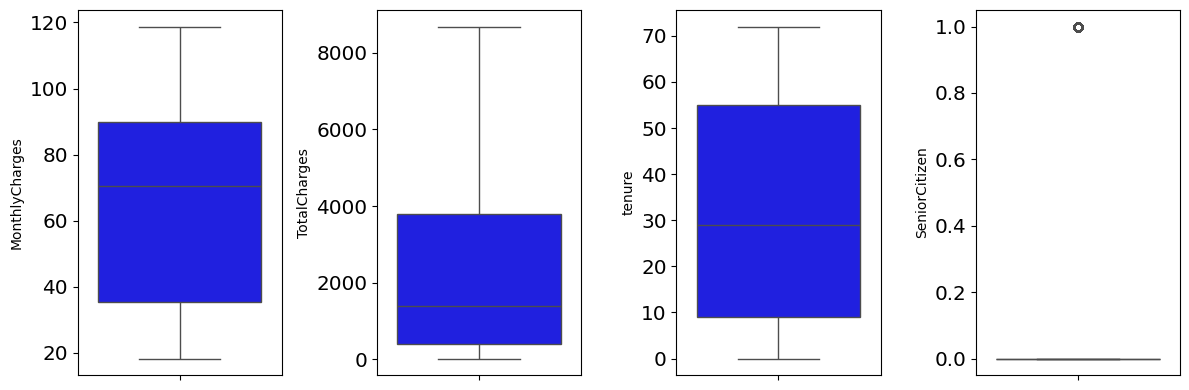

In [33]:
import seaborn as sns
for i in range(0, len(nume)):
    plt.subplot(1, len(nume), i+1)
    sns.boxplot(y=df[nume[i]], color='blue', orient='v')
    plt.tight_layout()

### Visualisasi untuk tipe data kategorikal

C:\Users\hppav\AppData\Local\Temp\ipykernel_22084\3367013363.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
C:\Users\hppav\AppData\Local\Temp\ipykernel_22084\3367013363.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
C:\Users\hppav\AppData\Local\Temp\ipykernel_22084\3367013363.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
C:\Users\hppav\AppData\Local\Temp\ipykernel_22084\3367013363.py:12:

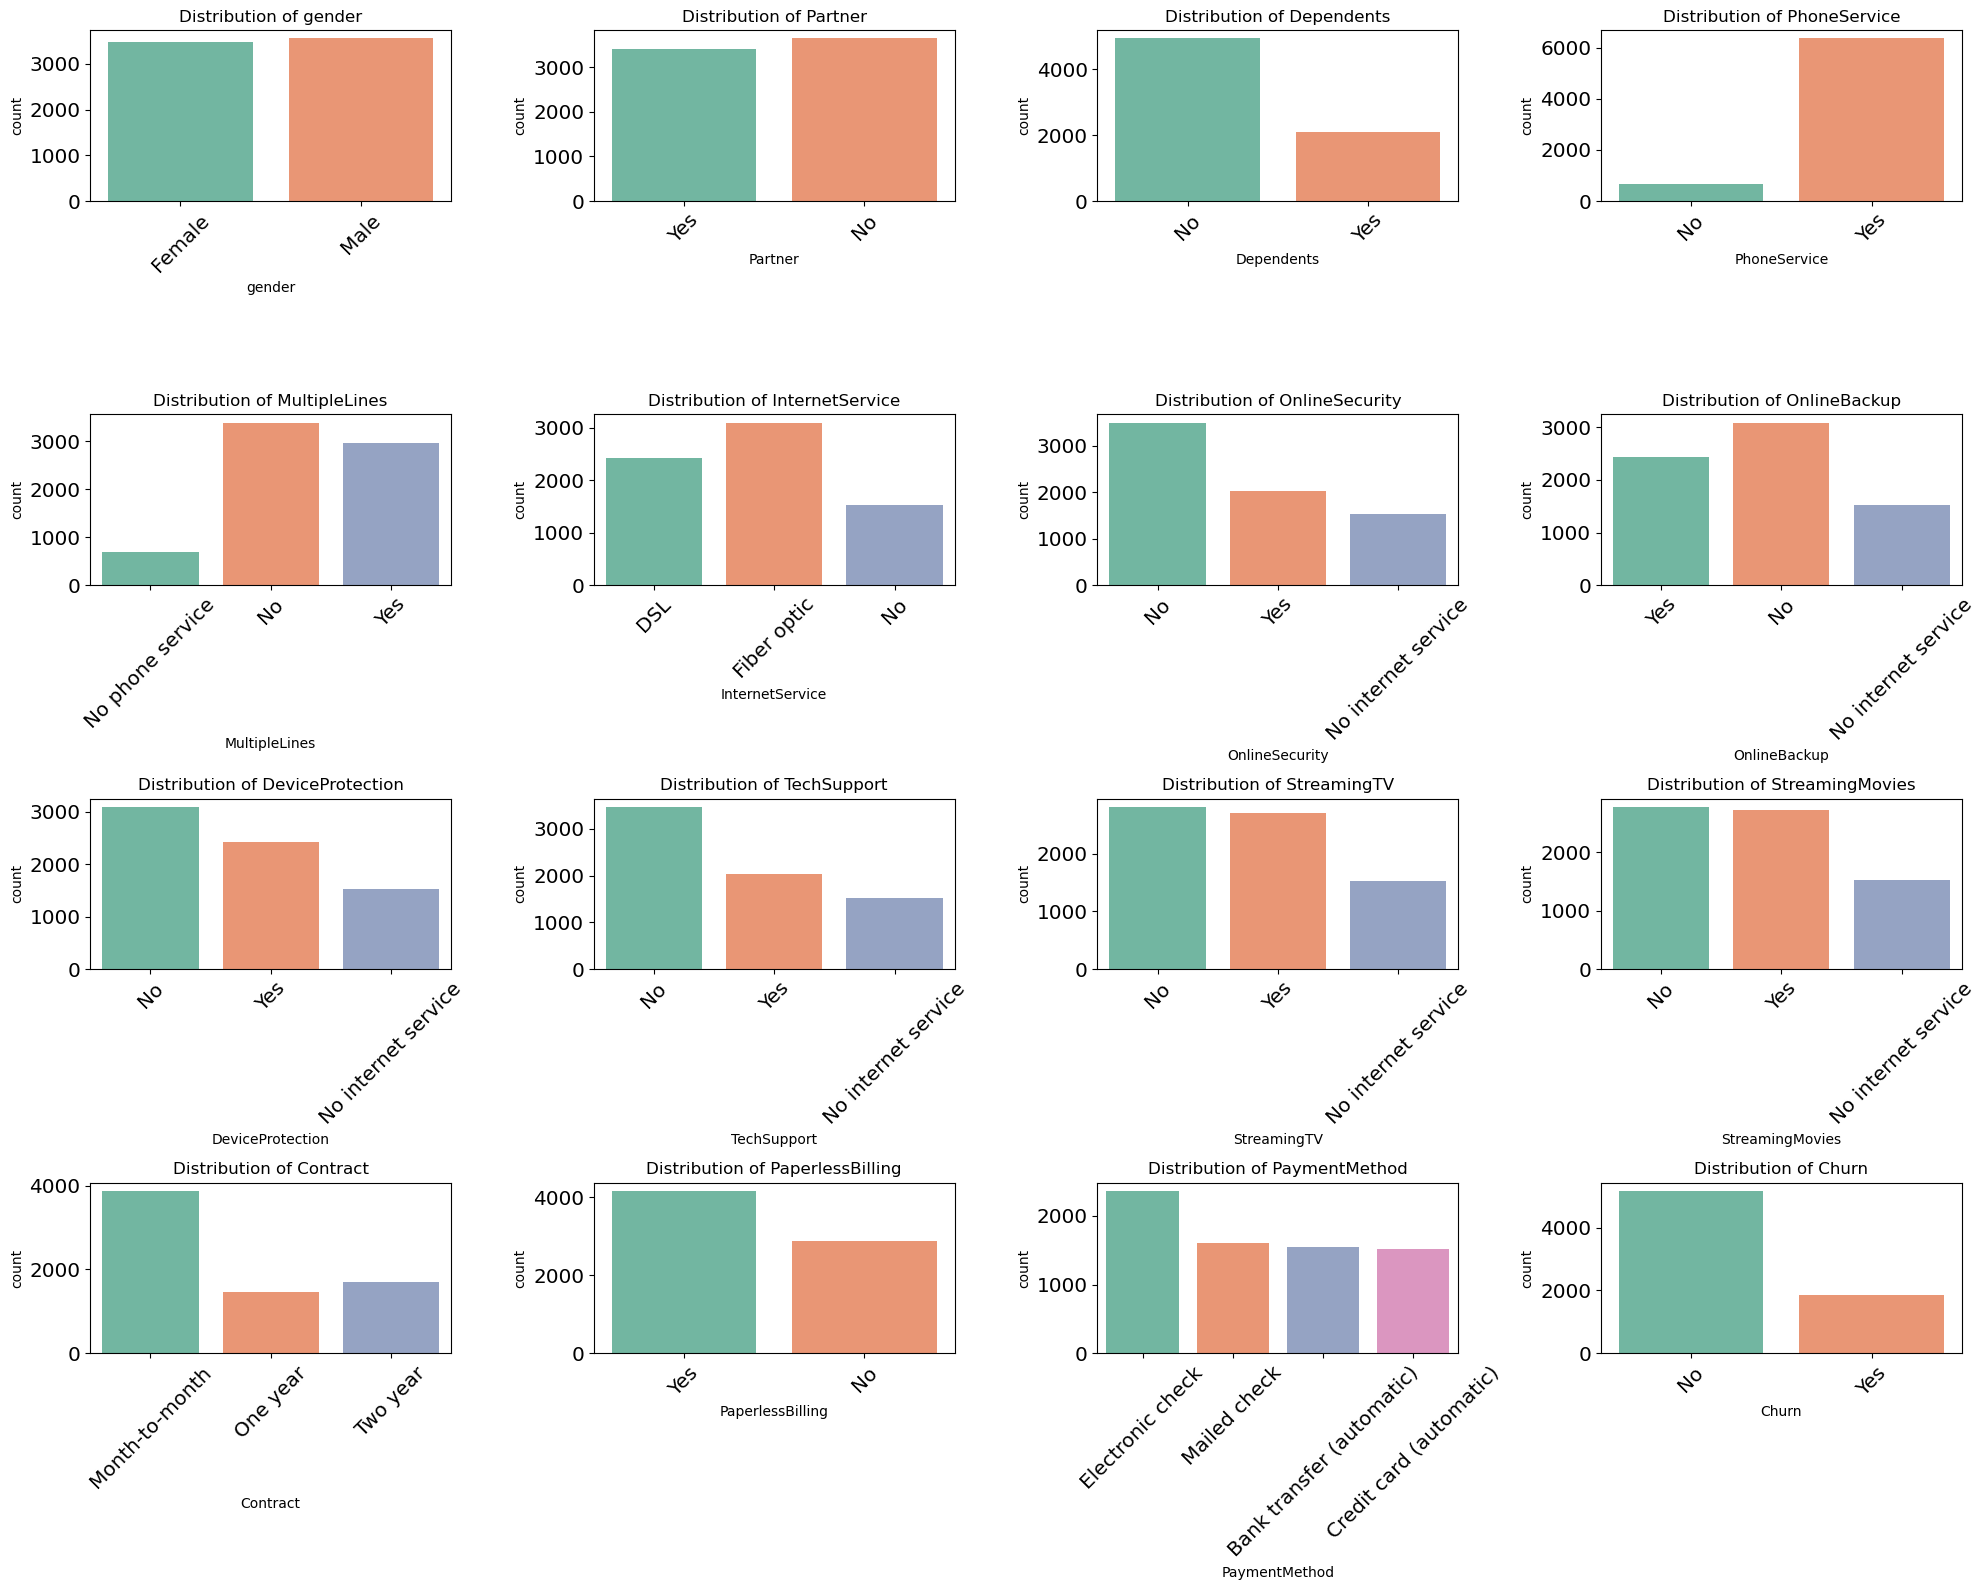

In [ ]:
import math
ncols = 4  # Jumlah kolom per baris
nrows = math.ceil(len(cat) / ncols)  # Jumlah baris

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(cat):
    sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hapus sisa subplot kosong
for j in range(len(cat), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Berdasarkan dari hasil visualisasi pada distribusi yang ada didapatkan bahwa untuk fitur churn mengalami inbalancing data, sehingga perlu dilakukan treatment lebih lanjut untuk mengenai hal tersebut.

# Data Preprocessing

## Melakukan Label Encoding 

In [43]:
from sklearn.preprocessing import LabelEncoder

# Fitur dengan nilai Male/Female dan Yes/No
label_cols = [col for col in df.columns if set(df[col].unique()) <= set(['Male', 'Female', 'Yes', 'No'])]

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

df[label_cols].head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,1,1
3,1,0,0,0,0,0
4,0,0,0,1,1,1


In [44]:
# Melakukan one hot encoding pada fitur kategorikal yang belum di-label encoding
onehot_cols = [col for col in cat if col not in label_cols]
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


In [45]:
df = df.drop(columns=['customerID'])

In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Cek distribusi kelas setelah SMOTE
print(y_train_smote.value_counts())

Churn
0    4139
1    4139
Name: count, dtype: int64


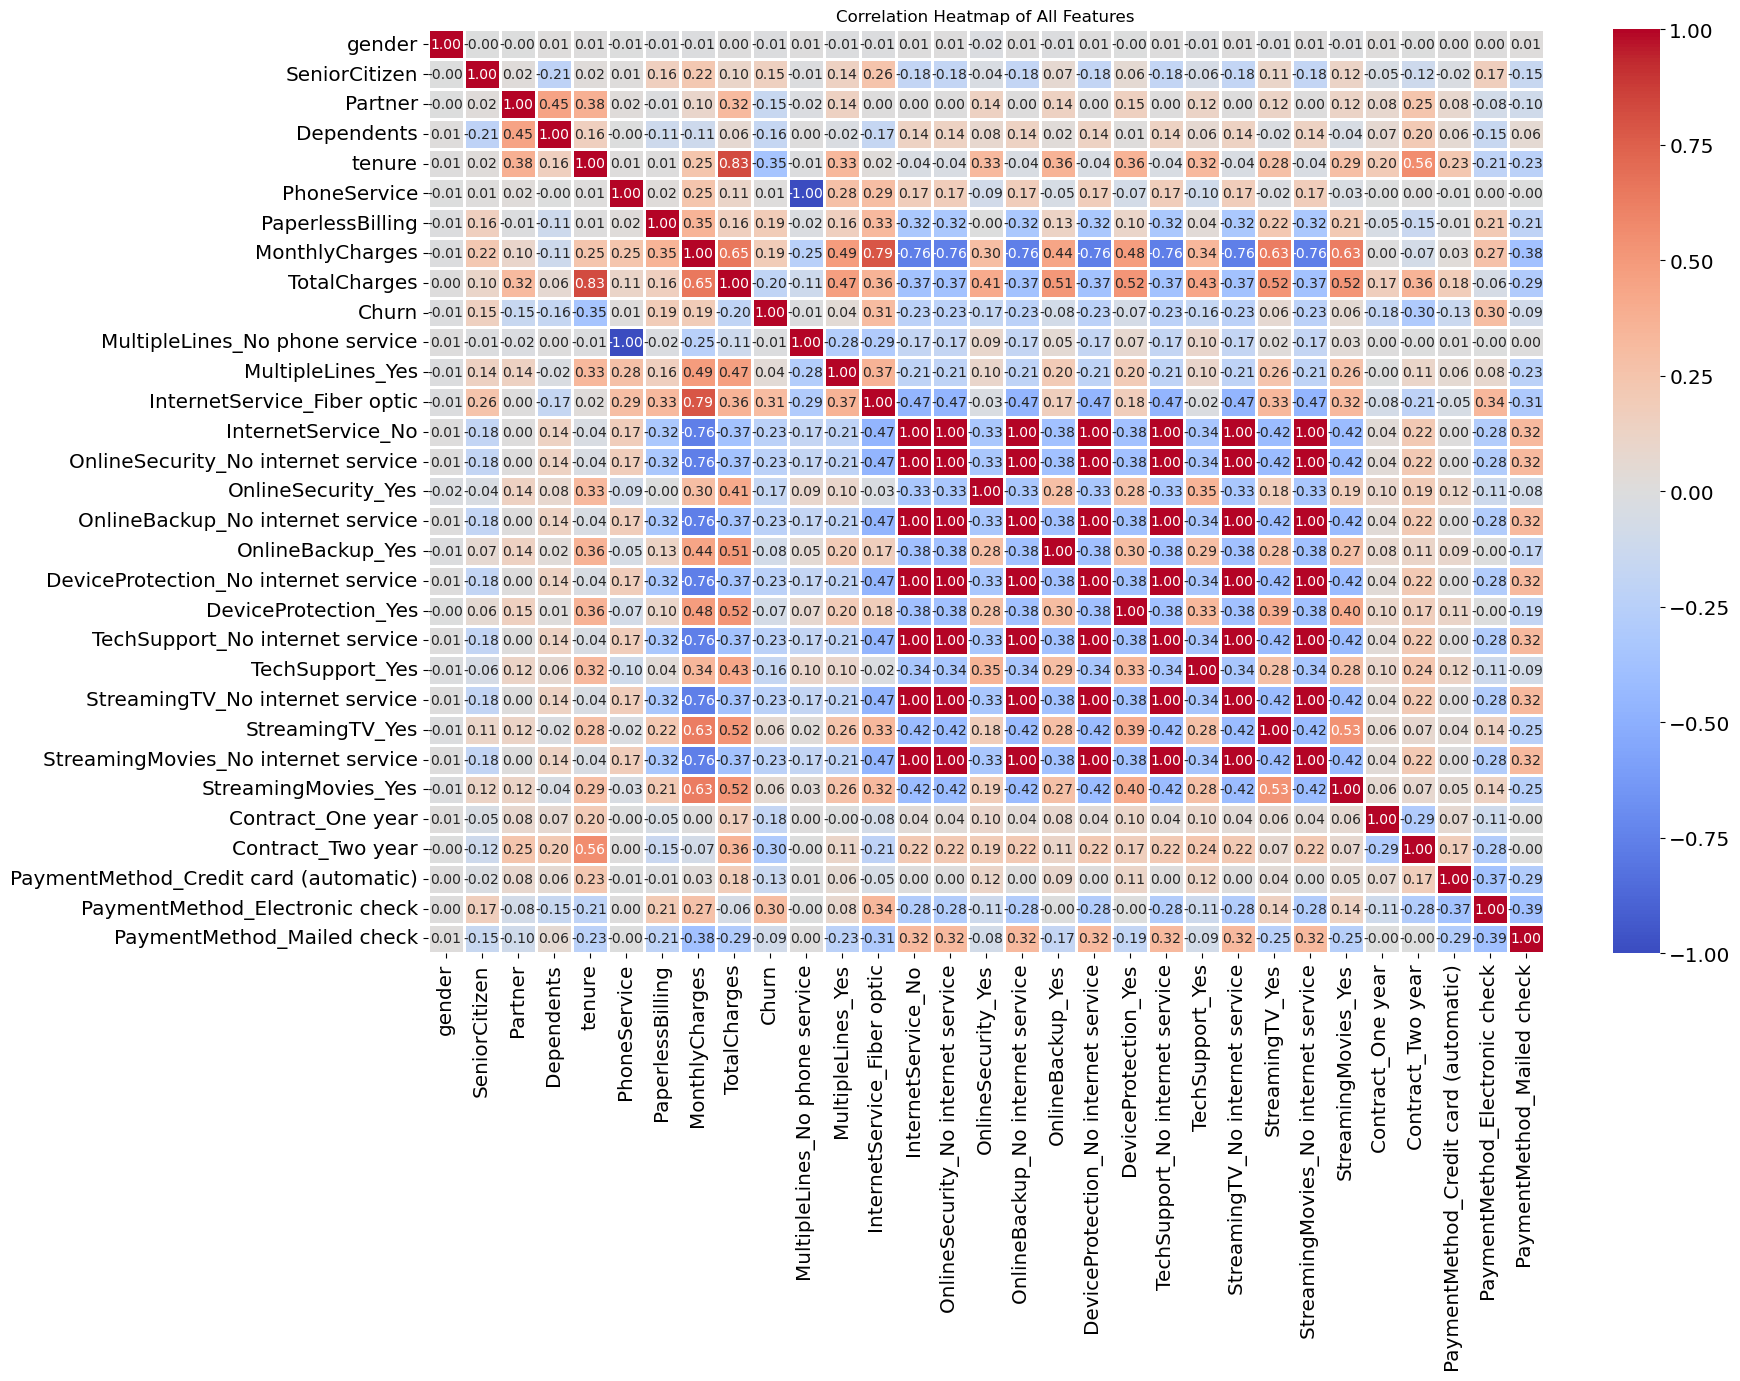

In [54]:
# Membuat correlation heatmap untuk semua fitur numerik
corr = df.corr(numeric_only=True)
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=1)
plt.title("Correlation Heatmap of All Features")
plt.show()

In [55]:
selected_features_final = [
    'tenure',
    'MonthlyCharges',
    'PaperlessBilling',
    'Contract_One year',
    'Contract_Two year',
    'InternetService_Fiber optic',
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check',
    'PaymentMethod_Credit card (automatic)',
    'OnlineSecurity_Yes',
    'TechSupport_Yes',
    'DeviceProtection_Yes'
]


# Modeling

## Logistic Regression

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Memisahkan fitur dan target
X = df[selected_features_final]
y = df['Churn']

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Membuat dan melatih model Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluasi model
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

[[921 114]
 [184 190]]


Berdasarkan hasil dari matrix evaluasi dari logistic regression didapatkan bahwa :

Akurasi: 79%
Artinya, dari seluruh prediksi, model benar dalam 79% kasus.

Precision Churn (Yes): 62%
Dari seluruh pelanggan yang diprediksi akan churn, 62% benar-benar churn.

Recall Churn (Yes): 51%
Dari seluruh pelanggan yang benar-benar churn, hanya 51% berhasil dikenali oleh model.

F1-Score Churn (Yes): 56%
Kombinasi antara precision dan recall churn, menunjukkan performa churn prediction masih sedang.

Karena hasilnya masih kurang maksimal maka perlu dilakukan ensemble methods yang dapat memperbaiki tingkat keandalan dari model

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Prediksi probabilitas untuk ROC AUC
y_test_proba = logreg.predict_proba(X_test)[:, 1]
y_train_proba = logreg.predict_proba(X_train)[:, 1]

# Evaluasi di test set
acc_test = accuracy_score(y_test, y_pred)
acc_train = accuracy_score(y_train, logreg.predict(X_train))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc_test = roc_auc_score(y_test, y_test_proba)
roc_auc_train = roc_auc_score(y_train, y_train_proba)

# Cross-validation recall
recall_cv_train = cross_val_score(logreg, X_train, y_train, cv=5, scoring='recall').mean()
recall_cv_test = cross_val_score(logreg, X_test, y_test, cv=5, scoring='recall').mean()

print(f"Accuracy (Test Set): {acc_test:.2f}")
print(f"Accuracy (Train Set): {acc_train:.2f}")
print(f"Precision (Test Set): {precision:.2f}")
print(f"Recall (Test Set): {recall:.2f}")
print(f"F1-Score (Test Set): {f1:.2f}")
print(f"roc_auc (test-proba): {roc_auc_test:.2f}")
print(f"roc_auc (train-proba): {roc_auc_train:.2f}")
print(f"recall (crossval train): {recall_cv_train:.2f}")
print(f"recall (crossval test): {recall_cv_test:.2f}")

Accuracy (Test Set): 0.79
Accuracy (Train Set): 0.80
Precision (Test Set): 0.62
Recall (Test Set): 0.51
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.84
recall (crossval train): 0.52
recall (crossval test): 0.48


Berdasarkan hasil evaluasi dari model tersebut didapatkan sebagai berikut :

1. Akurasi (Test): 79%
→ Model cukup baik dalam memprediksi keseluruhan data.

2. Precision (Churn): 62%
→ Dari prediksi churn, 62% benar-benar churn.

3. Recall (Churn): 51%
→ Model hanya berhasil mendeteksi separuh pelanggan yang benar-benar churn.

4. F1-Score (Churn): 56%
→ Performa churn class masih sedang.

5. ROC AUC (Test): 0.83
→ Model cukup baik dalam membedakan pelanggan churn dan tidak churn.

6. Cross-validation Recall (Test): 48%
→ Hasil validasi silang mendukung bahwa recall churn masih rendah dan perlu ditingkatkan.

Sehingga dapat disimpulkan bahwa Model Logistic Regression sudah cukup akurat dan stabil, namun masih kurang optimal dalam mengenali pelanggan yang benar-benar akan churn. Perlu ditingkatkan recall-nya melalui threshold tuning atau model yang lebih kompleks seperti Random Forest atau XGBoost.



## Hyperparameter Tuning Untuk Logistic

In [59]:
from sklearn.model_selection import RandomizedSearchCV

# Definisikan parameter grid untuk Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

# Inisialisasi model Logistic Regression
logreg_tune = LogisticRegression(max_iter=1000, random_state=42)

# GridSearchCV untuk mencari parameter terbaik
grid_search = RandomizedSearchCV(logreg_tune, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score (CV):", grid_search.best_score_)

# Evaluasi model terbaik di test set
best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(X_test)
print(classification_report(y_test, y_pred_best))

Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
Best Recall Score (CV): 0.5210702341137124
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [61]:
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# 1. Param grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

# 2. Model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# 3. RandomizedSearchCV
rand_search = RandomizedSearchCV(logreg, param_grid, scoring='recall', cv=5, n_jobs=-1)
rand_search.fit(X_train, y_train)

# 4. Ambil model terbaik
best_model = rand_search.best_estimator_

# 5. Evaluasi Test Set
y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1]

print("=== Test Set Evaluation ===")
print(classification_report(y_test, y_pred_test))
print("Accuracy (Test):", accuracy_score(y_test, y_pred_test))
print("ROC AUC (Test):", roc_auc_score(y_test, y_proba_test))

# 6. Cross-validation di keseluruhan training data
cv_results = cross_validate(
    best_model, X_train, y_train,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=True
)

# 7. Tampilkan rata-rata hasil cross-validation
print("\n=== Cross-Validation Scores (Train) ===")
for metric in ['train_accuracy', 'train_precision', 'train_recall', 'train_f1', 'train_roc_auc']:
    print(f"{metric}: {cv_results[metric].mean():.4f}")

print("\n=== Cross-Validation Scores (Validation) ===")
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']:
    print(f"{metric}: {cv_results[metric].mean():.4f}")


=== Test Set Evaluation ===
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy (Test): 0.7885024840312278
ROC AUC (Test): 0.8326474463303107

=== Cross-Validation Scores (Train) ===
train_accuracy: 0.7991
train_precision: 0.6512
train_recall: 0.5231
train_f1: 0.5801
train_roc_auc: 0.8416

=== Cross-Validation Scores (Validation) ===
test_accuracy: 0.7975
test_precision: 0.6474
test_recall: 0.5211
test_f1: 0.5771
test_roc_auc: 0.8389


Berdasarkan hasil hyperparameter tuning terhadap model regression logistic didapatkan bahwa :

1. Model sangat stabil: train vs test vs cross-validation metriknya konsisten → tidak overfitting.

2. ROC AUC tinggi (0.83–0.84) menunjukkan model mampu membedakan churn vs non-churn secara probabilistik dengan sangat baik.

3. Precision churn 0.62 artinya cukup andal saat memutuskan pelanggan akan churn.

Namun ada hal yang masih perlu dievaluasi adalah

1. Recall churn masih 0.51–0.52 → hanya separuh dari pelanggan churn yang berhasil dikenali.

Ini artinya, model masih “missed” 48–49% dari pelanggan yang benar-benar churn (false negative tinggi).

Oleh sebab itu perlu dilakukan ensemble Methods untuk memperbaiki ketepatan dan akurasi dari model

## Ensemble Methods XGBoost

In [65]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))


In [87]:
from sklearn.model_selection import cross_validate

def eval_with_crossval(model, X, y, cv=5):
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
    
    print("=== Cross-Validation (Validation Set) ===")
    for metric in scoring:
        print(f"{metric}: {scores[f'test_{metric}'].mean():.2f} ± {scores[f'test_{metric}'].std():.2f}")


In [88]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)
eval_with_crossval(best_model, X_train, y_train)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.60
Recall (Test Set): 0.50
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.96
=== Cross-Validation (Validation Set) ===
accuracy: 0.80 ± 0.01
precision: 0.65 ± 0.03
recall: 0.52 ± 0.03
f1: 0.58 ± 0.03
roc_auc: 0.84 ± 0.01


Berdasarkan hasil Ensemble Methods dengan menggunakan XGBoost didapatkan hasil sebagai berikut :

1.  Akurasi & ROC AUC Test tinggi (0.82) → model bisa memisahkan dua kelas dengan baik.

2. F1-score mendekati Logistic Regression (0.55) → konsisten.

Namun adapun catatan penting dari hal tersebut adalah 

1. Recall churn hanya 50% → sama seperti Logistic Regression.

2. ROC AUC Train = 0.96, jauh lebih tinggi dari test (0.82) → model kemungkinan overfitting, terlalu belajar dari data training.

Sehingga dapat disimpulkan bahwa XGBoost menunjukkan performa mirip dengan Logistic Regression dari segi akurasi dan ROC AUC di test set. Namun, recall churn masih rendah (50%), dan ROC AUC yang sangat tinggi di training set menunjukkan potensi overfitting. Sejauh ini, XGBoost belum memberikan peningkatan berarti atas Logistic Regression.

## Hyperparamater Tuning untuk model XGBoost

In [92]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)
eval_with_crossval(xg_tuned,X_train, y_train)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.65
Recall (Test Set): 0.52
F1-Score (Test Set): 0.58
roc_auc (test-proba): 0.84
roc_auc (train-proba): 0.88
=== Cross-Validation (Validation Set) ===
accuracy: 0.79 ± 0.02
precision: 0.63 ± 0.05
recall: 0.51 ± 0.02
f1: 0.56 ± 0.02
roc_auc: 0.83 ± 0.02


Berdasarkan dari hasil Model XGBoost yang telah dituning, menunjukkan peningkatan performa yang signifikan, baik dari segi akurasi, precision, recall, maupun F1-score. Selain itu, selisih ROC AUC antara training dan test set mengecil, mengindikasikan bahwa overfitting berhasil dikurangi. Lalu kita mencoba untuk model lain

## Ensemble Methods Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)
eval_with_crossval(rf, X_train, y_train)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.59
Recall (Test Set): 0.49
F1-Score (Test Set): 0.53
roc_auc (test-proba): 0.80
roc_auc (train-proba): 1.00
=== Cross-Validation (Validation Set) ===
accuracy: 0.77 ± 0.01
precision: 0.59 ± 0.03
recall: 0.48 ± 0.02
f1: 0.53 ± 0.02
roc_auc: 0.80 ± 0.01


## Hyperparameter Tuning Random Forest

In [72]:
from imblearn import over_sampling
X_train_over, y_train_over = over_sampling.SMOTE(sampling_strategy=0.5, random_state=42).fit_resample(X_train, y_train)

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_over, y_train_over)
eval_classification(rf)
eval_with_crossval(rf, X_train, y_train)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.56
Recall (Test Set): 0.52
F1-Score (Test Set): 0.54
roc_auc (test-proba): 0.80
roc_auc (train-proba): 1.00
=== Cross-Validation (Validation Set) ===
accuracy: 0.77 ± 0.01
precision: 0.59 ± 0.03
recall: 0.48 ± 0.02
f1: 0.53 ± 0.02
roc_auc: 0.80 ± 0.01


In [93]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 25, 25)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train_over, y_train_over)
eval_classification(rs)
eval_with_crossval(rs, X_train, y_train)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.61
Recall (Test Set): 0.61
F1-Score (Test Set): 0.61
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.90
=== Cross-Validation (Validation Set) ===
accuracy: 0.79 ± 0.01
precision: 0.65 ± 0.03
recall: 0.48 ± 0.04
f1: 0.55 ± 0.03
roc_auc: 0.84 ± 0.01


# Summary Model

In [97]:
from sklearn.model_selection import cross_validate

# Summary evaluasi model dan cross-validation

# Tampilkan summary metrik utama dari DataFrame summary_df
print("=== Summary Evaluasi Model (Test Set) ===")
display(summary_df)

# Cross-validation untuk model terbaik dari setiap jenis (menggunakan cross_validate)

models_cv = {
    "Logistic Regression (Tuned)": grid_search.best_estimator_,
    "XGBoost (Tuned)": xg_tuned.best_estimator_,
    "Random Forest (Tuned)": rs.best_estimator_
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

cv_summary = {}
for name, model in models_cv.items():
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    cv_summary[name] = {metric: f"{scores[f'test_{metric}'].mean():.3f} ± {scores[f'test_{metric}'].std():.3f}" for metric in scoring}

cv_df = pd.DataFrame(cv_summary).T
print("\n=== Cross-Validation (5-Fold) Scores ===")
display(cv_df)

=== Summary Evaluasi Model (Test Set) ===


,Model,Accuracy (Test),Precision (Test),Recall (Test),F1-Score (Test),ROC AUC (Test)
0,Logistic Regression (Default),0.7885,0.625,0.508,0.560,0.833
1,Logistic Regression (Tuned),0.7975,0.647,0.521,0.577,0.839
2,XGBoost (Default),0.7800,0.620,0.500,0.550,0.820
3,XGBoost (Tuned),0.8000,0.650,0.520,0.580,0.840
4,Random Forest (Default),0.7700,0.620,0.510,0.560,0.830
5,Random Forest (Tuned),0.7910,0.606,0.612,0.609,0.835



=== Cross-Validation (5-Fold) Scores ===


,accuracy,precision,recall,f1,roc_auc
Logistic Regression (Tuned),0.797 ± 0.013,0.647 ± 0.031,0.521 ± 0.029,0.577 ± 0.028,0.839 ± 0.015
XGBoost (Tuned),0.799 ± 0.017,0.654 ± 0.042,0.517 ± 0.034,0.577 ± 0.036,0.840 ± 0.014
Random Forest (Tuned),0.794 ± 0.008,0.651 ± 0.023,0.487 ± 0.021,0.557 ± 0.018,0.838 ± 0.013


# Feature Importance untuk model Random Forest

C:\Users\hppav\AppData\Local\Temp\ipykernel_22084\3911331462.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_rf_df, palette='viridis')


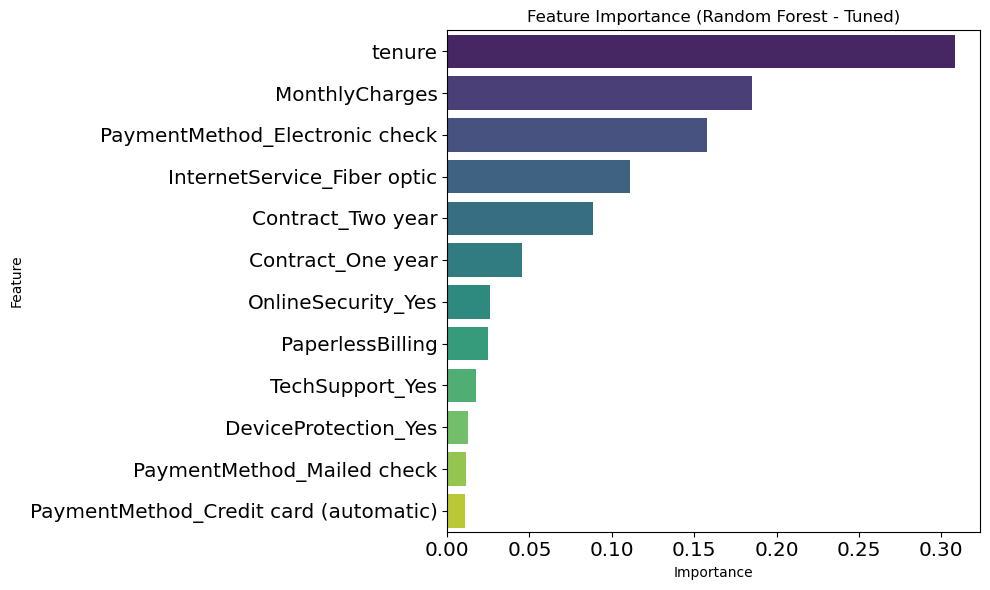

,Feature,Importance
0,tenure,0.308147
1,MonthlyCharges,0.185138
6,PaymentMethod_Electronic check,0.158011
5,InternetService_Fiber optic,0.110869
4,Contract_Two year,0.088791
3,Contract_One year,0.045611
9,OnlineSecurity_Yes,0.025873
2,PaperlessBilling,0.024688
10,TechSupport_Yes,0.017631
11,DeviceProtection_Yes,0.012698


In [83]:
# Analisis feature importance menggunakan model Random Forest hasil tuning (rs)
importances_rf = rs.best_estimator_.feature_importances_
feature_names_rf = X_train_over.columns

# Buat dataframe untuk visualisasi
feat_imp_rf_df = pd.DataFrame({
    'Feature': feature_names_rf,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_rf_df, palette='viridis')
plt.title('Feature Importance (Random Forest - Tuned)')
plt.tight_layout()
plt.show()

feat_imp_rf_df

# Kesimpulan 

Dalam upaya memahami faktor-faktor utama yang memengaruhi keputusan pelanggan untuk berhenti menggunakan layanan (churn), model Random Forest yang telah dilakukan hyperparameter tuning menunjukkan sejumlah fitur yang paling berkontribusi terhadap prediksi churn.

Fitur paling penting dalam model ini adalah tenure, atau lamanya pelanggan menggunakan layanan. Hal ini menunjukkan bahwa pelanggan dengan masa langganan yang lebih lama cenderung memiliki loyalitas yang lebih tinggi dan kecil kemungkinannya untuk churn. Sebaliknya, pelanggan baru atau dengan durasi yang lebih pendek menjadi segmen yang lebih rentan. Oleh karena itu, pendekatan khusus seperti onboarding yang lebih baik atau penawaran early loyalty program dapat menjadi strategi yang efektif.

Fitur penting berikutnya adalah MonthlyCharges, yang menunjukkan bahwa pelanggan dengan biaya bulanan tinggi memiliki kecenderungan churn yang lebih besar. Hal ini mengindikasikan bahwa pelanggan mungkin mempertanyakan nilai dari layanan yang mereka bayar. Evaluasi terhadap struktur harga dan persepsi manfaat layanan menjadi penting.

PaymentMethod_Electronic check juga muncul sebagai indikator kuat churn. Metode pembayaran ini berkorelasi dengan churn yang lebih tinggi, mungkin karena ketidaknyamanan atau potensi gagal bayar. Hal ini dapat menjadi pertimbangan dalam strategi komunikasi dan edukasi terhadap pelanggan dalam menggunakan metode pembayaran yang lebih stabil.

Fitur lain seperti Contract_Two year dan Contract_One year memiliki kontribusi penting, di mana pelanggan dengan kontrak jangka panjang cenderung lebih loyal dibandingkan dengan pelanggan berkontrak bulanan. Ini membuka peluang bagi perusahaan untuk mendorong kontrak jangka panjang sebagai salah satu strategi retensi pelanggan.

Selain itu, fitur-fitur seperti OnlineSecurity_Yes, TechSupport_Yes, dan DeviceProtection_Yes juga berperan dalam menurunkan risiko churn. Ini mengindikasikan bahwa pelanggan yang menggunakan layanan tambahan merasa lebih aman dan puas, sehingga cenderung bertahan lebih lama. Penyediaan layanan bernilai tambah seperti ini dapat dijadikan bagian dari strategi customer engagement.

Terakhir, fitur seperti PaperlessBilling menunjukkan dampak yang lebih kecil namun tetap signifikan. Pelanggan yang menggunakan tagihan digital sedikit lebih mungkin untuk churn, yang mungkin disebabkan oleh kurangnya transparansi atau pemahaman terhadap tagihan digital tersebut.

